# Question B2

In [57]:
import pandas as pd
import metdata
from matplotlib import pyplot as plt

In [58]:
metdata.load_all()

load aberporth
load armagh
load ballypatrick
load bradford
load braemar
load camborne
load cambridge
load cardiff
load chivenor
load cwmystwyth
load dunstaffnage
load durham
load eastbourne
load eskdalemuir
load heathrow
load hurn
load lerwick
load leuchars
load lowestoft
load manston
load nairn
load newtonrigg
load oxford
load paisley
load ringway
load rossonwye
load shawbury
load sheffield
load southampton
load stornoway
load suttonbonington
load tiree
load valley
load waddington
load whitby
load wickairport
load yeovilton


In [59]:
def find_first_year(stations_list, all_stations_data):
    years_list = []
    if len(all_stations_data) > 0:
        for station in stations_list:
            if station in all_stations_data:
                station_data = all_stations_data[station]
                for record in station_data.itertuples(index = False):
                    if hasattr(record, 'yyyy'):
                        year = record.yyyy
                        month = record.mm
                        if int(month) == 1:
                            years_list.append(int(year))
                            break  #stop iterating for current station once a January is matched
        return years_list
    else:
        return None


In [60]:
stations_list = metdata.all_names()

In [61]:
all_stations_data = metdata.dfs

In [62]:
years_list = find_first_year(stations_list, all_stations_data)
print("years_list =", years_list)

years_list = [1941, 1853, 1962, 1908, 1959, 1979, 1959, 1978, 1951, 1959, 1972, 1880, 1959, 1911, 1948, 1957, 1931, 1957, 1914, 1935, 1931, 1959, 1853, 1959, 1946, 1931, 1946, 1883, 1855, 1874, 1959, 1928, 1931, 1947, 1962, 1914, 1965]


In [63]:
#first_year = min(years_list) if years_list else None
first_year = max(years_list)
print("first_year =", first_year)

first_year = 1979


In [64]:
all_stations_data = metdata.dfs

In [65]:
# make a copy of every station DataFrame
all_dfs = [ df.copy() for df in all_stations_data.values() ]
all_dfs

[     yyyy  mm  tmax_C  tmin_C  af_days  rain_mm  sun_hours    station
 0    1941   1     NaN     NaN      NaN     74.7        NaN  aberporth
 1    1941   2     NaN     NaN      NaN     69.1        NaN  aberporth
 2    1941   3     NaN     NaN      NaN     76.2        NaN  aberporth
 3    1941   4     NaN     NaN      NaN     33.7        NaN  aberporth
 4    1941   5     NaN     NaN      NaN     51.3        NaN  aberporth
 ..    ...  ..     ...     ...      ...      ...        ...        ...
 985  2023   2     9.3     4.6      0.0     17.2       72.0  aberporth
 986  2023   3     9.5     4.9      0.0    116.6       47.2  aberporth
 987  2023   4    11.9     5.9      0.0     40.8      142.1  aberporth
 988  2023   5    15.0     9.2      0.0     20.8      235.0  aberporth
 989  2023   6    20.1    12.9      0.0     22.6      231.0  aberporth
 
 [990 rows x 8 columns],
       yyyy  mm  tmax_C  tmin_C  af_days  rain_mm  sun_hours station
 0     1853   1     NaN     NaN      NaN     57.3   

In [66]:
# fill in all NaNs with the column mean (per station)
for df in all_dfs:
    # Fill the missing values with the corresponding column average
    column_averages = df.mean(numeric_only = True)
    df.fillna(column_averages, inplace=True)

In [67]:
# after doing per-station average fill in, join them all up
big_df = pd.concat(all_dfs)

In [68]:
# just pick the years we want
reduced_df = big_df[big_df['yyyy'] >= first_year]

In [69]:
print (reduced_df)

       yyyy   mm  tmax_C  tmin_C  af_days  rain_mm  sun_hours    station  \
456  1979.0  1.0     4.6    -0.4     17.0     91.1       69.4  aberporth   
457  1979.0  2.0     4.5     0.3     12.0     54.2       71.9  aberporth   
458  1979.0  3.0     6.9     2.2      3.0     83.3       80.9  aberporth   
459  1979.0  4.0     9.7     4.3      1.0     68.2      160.7  aberporth   
460  1979.0  5.0    11.6     5.4      0.0     98.3      191.5  aberporth   
..      ...  ...     ...     ...      ...      ...        ...        ...   
701  2023.0  2.0    10.6     2.0     10.0      5.4        1.6  yeovilton   
702  2023.0  3.0    11.0     4.8      2.0    113.2        5.7  yeovilton   
703  2023.0  4.0    13.7     4.6      4.0     59.6        7.3  yeovilton   
704  2023.0  5.0    18.5     7.5      0.0     68.4        1.1  yeovilton   
705  2023.0  6.0    23.4    12.0      0.0     22.8        4.9  yeovilton   

     latitude  
456       NaN  
457       NaN  
458       NaN  
459       NaN  
460    

In [70]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19097 entries, 456 to 705
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yyyy       19097 non-null  float64
 1   mm         19097 non-null  float64
 2   tmax_C     19097 non-null  float64
 3   tmin_C     19097 non-null  float64
 4   af_days    19097 non-null  float64
 5   rain_mm    19097 non-null  float64
 6   sun_hours  19097 non-null  float64
 7   station    19097 non-null  object 
 8   latitude   2670 non-null   float64
dtypes: float64(8), object(1)
memory usage: 1.5+ MB


In [71]:
# check the % of missing values
print(df.isnull().sum()/len(df))

yyyy         0.0
mm           0.0
tmax_C       0.0
tmin_C       0.0
af_days      0.0
rain_mm      0.0
sun_hours    0.0
station      0.0
latitude     0.0
dtype: float64


In [72]:
df = reduced_df

In [73]:
# Calculate the column-wise average
column_averages = df.mean(numeric_only = True)

# Fill the missing values with the corresponding column average
df.fillna(column_averages, inplace=True)
df

C:\Users\faroo\AppData\Local\Temp\ipykernel_32856\1123543886.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(column_averages, inplace=True)


,yyyy,mm,tmax_C,tmin_C,af_days,rain_mm,sun_hours,station,latitude
456,1979.0,1.0,4.6,-0.4,17.0,91.1,69.4,aberporth,54.0736
457,1979.0,2.0,4.5,0.3,12.0,54.2,71.9,aberporth,54.0736
458,1979.0,3.0,6.9,2.2,3.0,83.3,80.9,aberporth,54.0736
459,1979.0,4.0,9.7,4.3,1.0,68.2,160.7,aberporth,54.0736
460,1979.0,5.0,11.6,5.4,0.0,98.3,191.5,aberporth,54.0736
...,...,...,...,...,...,...,...,...,...
701,2023.0,2.0,10.6,2.0,10.0,5.4,1.6,yeovilton,51.0060
702,2023.0,3.0,11.0,4.8,2.0,113.2,5.7,yeovilton,51.0060
703,2023.0,4.0,13.7,4.6,4.0,59.6,7.3,yeovilton,51.0060
704,2023.0,5.0,18.5,7.5,0.0,68.4,1.1,yeovilton,51.0060


In [74]:
# check the % of missing values
print(df.isnull().sum()/len(df))

yyyy         0.0
mm           0.0
tmax_C       0.0
tmin_C       0.0
af_days      0.0
rain_mm      0.0
sun_hours    0.0
station      0.0
latitude     0.0
dtype: float64


In [75]:
df = pd.DataFrame({
    'STATION': reduced_df['station'],
    'YEAR': reduced_df['yyyy'],
    'MONTH': reduced_df['mm'],
    'TMAX': reduced_df['tmax_C'],
    'TMIN': reduced_df['tmin_C'],
    'AF': reduced_df['af_days'],
    'RAIN': reduced_df['rain_mm'],
    'SUN': reduced_df['sun_hours'],
    'STATION': reduced_df['station']
})
df

,STATION,YEAR,MONTH,TMAX,TMIN,AF,RAIN,SUN
456,aberporth,1979.0,1.0,4.6,-0.4,17.0,91.1,69.4
457,aberporth,1979.0,2.0,4.5,0.3,12.0,54.2,71.9
458,aberporth,1979.0,3.0,6.9,2.2,3.0,83.3,80.9
459,aberporth,1979.0,4.0,9.7,4.3,1.0,68.2,160.7
460,aberporth,1979.0,5.0,11.6,5.4,0.0,98.3,191.5
...,...,...,...,...,...,...,...,...
701,yeovilton,2023.0,2.0,10.6,2.0,10.0,5.4,1.6
702,yeovilton,2023.0,3.0,11.0,4.8,2.0,113.2,5.7
703,yeovilton,2023.0,4.0,13.7,4.6,4.0,59.6,7.3
704,yeovilton,2023.0,5.0,18.5,7.5,0.0,68.4,1.1


In [76]:
#### *** To check the relationship between each element ***

Text(0, 0.5, 'TMIN')

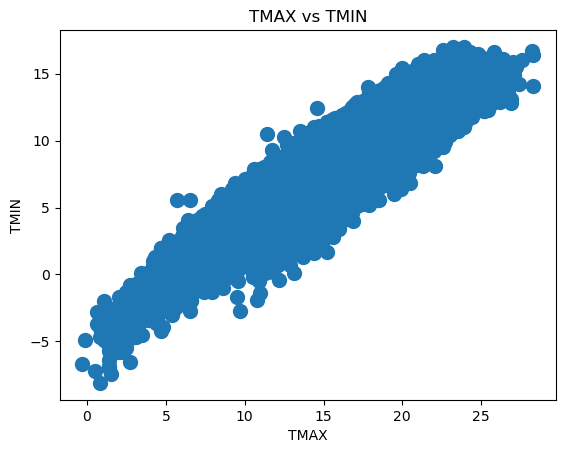

In [77]:
# Observe how the data is scattered on a scatter plot
# Plot scatter plots between each two features
# If any two features show a linear relationship, select only one of those two features
plt.scatter(df['TMAX'], df['TMIN'], s=100)
plt.title('TMAX vs TMIN')
plt.xlabel('TMAX')
plt.ylabel('TMIN')

Text(0, 0.5, 'RAIN')

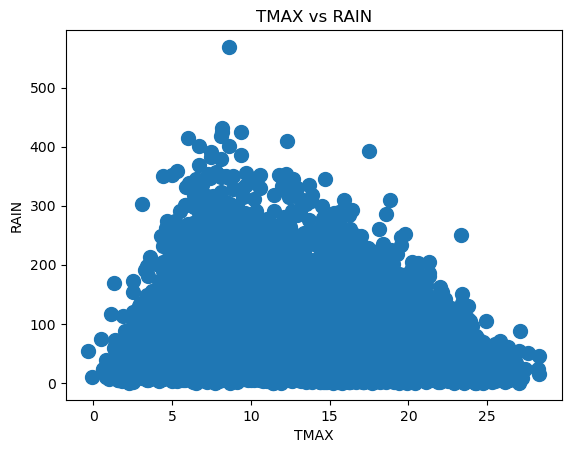

In [78]:
plt.scatter(df['TMAX'], df['RAIN'], s=100)
plt.title('TMAX vs RAIN')
plt.xlabel('TMAX')
plt.ylabel('RAIN')

Text(0, 0.5, 'AF')

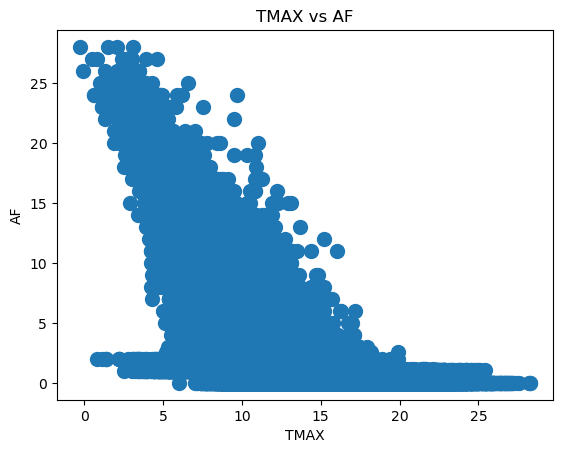

In [79]:
plt.scatter(df['TMAX'], df['AF'], s=100)
plt.title('TMAX vs AF')
plt.xlabel('TMAX')
plt.ylabel('AF')

Text(0, 0.5, 'SUN')

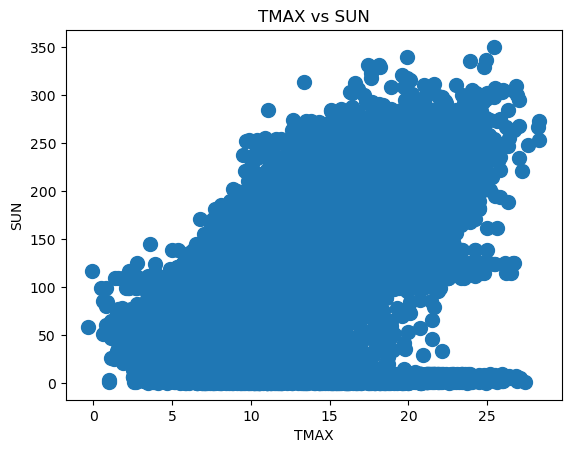

In [80]:
plt.scatter(df['TMAX'], df['SUN'], s=100)
plt.title('TMAX vs SUN')
plt.xlabel('TMAX')
plt.ylabel('SUN')

Text(0, 0.5, 'SUN')

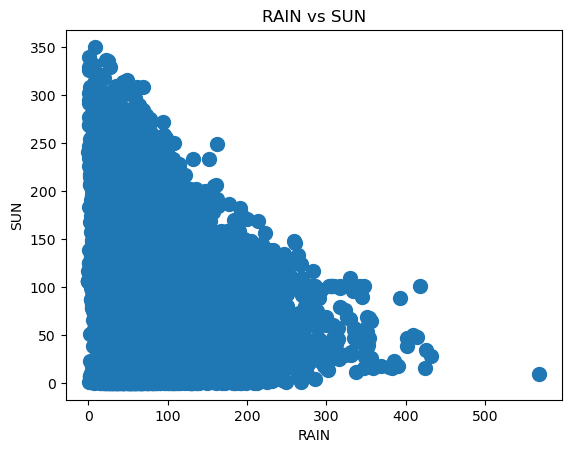

In [81]:
plt.scatter(df['RAIN'], df['SUN'], s=100)
plt.title('RAIN vs SUN')
plt.xlabel('RAIN')
plt.ylabel('SUN')

In [82]:
### *** Question Q - B2 ***

In [94]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,  mean_squared_error,  r2_score

In [84]:
# Create an empty dictionary to store the latitude data
stations_latitude_dict = {}

# Iterate over the list of stations
for station in stations_list:
    # Fetch the DataFrame for the station
    station_df = metdata.get_df(station)
    
    # Extract the latitude from the DataFrame
    latitude = station_df.lat
    
    # Store the station and respective latitude in the dictionary
    stations_latitude_dict[station] = latitude

print(stations_latitude_dict)

{'aberporth': 52.139, 'armagh': 54.352, 'ballypatrick': 55.181, 'bradford': 53.813, 'braemar': 57.006, 'camborne': 50.218, 'cambridge': 52.245, 'cardiff': 51.488, 'chivenor': 51.089, 'cwmystwyth': 52.358, 'dunstaffnage': 56.451, 'durham': 54.768, 'eastbourne': 50.762, 'eskdalemuir': 55.311, 'heathrow': 51.479, 'hurn': 50.779, 'lerwick': 60.139, 'leuchars': 56.377, 'lowestoft': 52.483, 'manston': 51.346, 'nairn': 57.593, 'newtonrigg': 54.67, 'oxford': 51.761, 'paisley': 55.846, 'ringway': 53.356, 'rossonwye': 51.911, 'shawbury': 52.794, 'sheffield': 53.381, 'southampton': 50.898, 'stornoway': 58.214, 'suttonbonington': 52.833, 'tiree': 56.5, 'valley': 53.252, 'waddington': 53.175, 'whitby': 54.481, 'wickairport': 58.454, 'yeovilton': 51.006}


In [85]:
northern_third = []
central_third = []
southern_third = []

for station, latitude in stations_latitude_dict.items():
    if latitude >= 60.9:
        northern_third.append(station)
    elif latitude >= 49.9:
        central_third.append(station)
    else:
        southern_third.append(station)

print("Northern Third Stations:")
print(northern_third)
print("\nCentral Third Stations:")
print(central_third)
print("\nSouthern Third Stations:")
print(southern_third)

Northern Third Stations:
[]

Central Third Stations:
['aberporth', 'armagh', 'ballypatrick', 'bradford', 'braemar', 'camborne', 'cambridge', 'cardiff', 'chivenor', 'cwmystwyth', 'dunstaffnage', 'durham', 'eastbourne', 'eskdalemuir', 'heathrow', 'hurn', 'lerwick', 'leuchars', 'lowestoft', 'manston', 'nairn', 'newtonrigg', 'oxford', 'paisley', 'ringway', 'rossonwye', 'shawbury', 'sheffield', 'southampton', 'stornoway', 'suttonbonington', 'tiree', 'valley', 'waddington', 'whitby', 'wickairport', 'yeovilton']

Southern Third Stations:
[]


In [86]:
# Sort the dictionary by keys in alphabetical order
sorted_dict = dict(sorted(stations_latitude_dict.items(), key=lambda item: item[0]))

# Extract the last 5 stations along with their latitudes
last_5_stations = list(sorted_dict.keys())[-5:]
last_5_latitudes = [sorted_dict[station] for station in last_5_stations]

# Print the last 5 stations and their latitudes
for station, latitude in zip(last_5_stations, last_5_latitudes):
    print(station, ':', latitude)

valley : 53.252
waddington : 53.175
whitby : 54.481
wickairport : 58.454
yeovilton : 51.006


In [87]:
# Create a dictionary with these 5 stations

weather_stations = {
    'valley': 53.252,
    'waddington': 53.175,
    'whitby': 54.481,
    'wickairport': 58.454,
    'yeovilton': 51.006
}

In [88]:
# Iterate over the weather stations and fetch the corresponding DataFrame
dataframes = []
for station, latitude in weather_stations.items():
    df = metdata.get_df(station)
    df['station'] = station
    df['latitude'] = latitude
    dataframes.append(df)

weather_data = pd.concat(dataframes)
weather_data = weather_data[['tmax_C', 'rain_mm', 'sun_hours', 'latitude']]
#target_variable = weather_data[['latitude']]

print(weather_data)
#print(target_variable)

     tmax_C  rain_mm  sun_hours  latitude
0       8.6    130.3       31.5    53.252
1       8.0     66.2       63.8    53.252
2       7.6     60.6       74.1    53.252
3       8.5     32.5      130.3    53.252
4       9.9     47.1      119.0    53.252
..      ...      ...        ...       ...
701    10.6      5.4        1.6    51.006
702    11.0    113.2        5.7    51.006
703    13.7     59.6        7.3    51.006
704    18.5     68.4        1.1    51.006
705    23.4     22.8        4.9    51.006

[4791 rows x 4 columns]


In [89]:
# Define the features (X) and target variable (y)
X = weather_data[['tmax_C', 'rain_mm', 'sun_hours']]  # Selecting the weather data features for X
y = weather_data['latitude']  # Selecting the target variable (latitude) for y

In [90]:
# Split the data into training and test sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of SimpleImputer with 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_imputed, y_train)

# Predict the latitude for the test set
y_pred = model.predict(X_test_imputed)

In [95]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Absolute Error: 2.0996387494983924
Mean Squared Error: 6.21749585787097
Root Mean Squared Error: 2.4934906973700484
R-squared: 0.08716681809756677


### *** The End ***